In [2]:
import os
import sys
import argparse
sys.path.append("..")
sys.path.append("../..")
sys.path.append("../../..")
from lib.logging import print_msg
from lib.read_data import data_read

def load_data(path):
    print(path)
    data = {}
    for pkl_name in sorted(os.listdir(path)):
        if ".pkl" in pkl_name:
            print(pkl_name)
            data[int(pkl_name.split(".pkl")[0])] = data_read(path, pkl_name)
    return data

result_path = "../../workload_manage/five_workloads_3/result"

data = {}

for workload_name in sorted(os.listdir(result_path)):
    print(workload_name)
    if workload_name.startswith("workload"):
        data[workload_name] = {}


#         for run_name in ["bf", "gd"]:
        for run_name in ["gd"]:
            if run_name == "gd":
                result_search_path_temp = os.path.join(result_path, workload_name, run_name)
                for timeout_name in sorted(os.listdir(result_search_path_temp)):
                    if "_" in timeout_name and timeout_name == "5_5":
                        result_search_path = os.path.join(result_search_path_temp, timeout_name)
                        data[workload_name][f"gd_{timeout_name}"] = load_data(result_search_path)
            else:
                result_search_path = os.path.join(result_path, workload_name, run_name)
                data[workload_name][run_name] = load_data(result_search_path)

workload_1
../../workload_manage/five_workloads_3/result/workload_1/gd/5_5
10.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 10.pkl
[success]
12.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 12.pkl
[success]
14.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 14.pkl
[success]
16.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 16.pkl
[success]
18.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 18.pkl
[success]
2.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 2.pkl
[success]
20.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 20.pkl
[success]
22.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 22.pkl
[success]
24.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 24.pkl
[success]
4.pkl
[lo

In [3]:
data['workload_1']['gd_5_5'][12]['df_list'][0]

,before,after,hash_reuse,hash_xor,salu_reuse,salu_merge,hfs_reuse
hashcall,50.0,36.111111,13.888889,0,0.0,0,0
salu,25.0,25.000000,0.000000,0,0.0,0,0
sram,2.5,2.500000,0.000000,0,0.0,0,0


gd_5_5
before [80.55555555555554]
after [59.72222222222222]
before [85.41666666666667]
after [62.499999999999986]
before [20.104166666666664]
after [19.479166666666668]


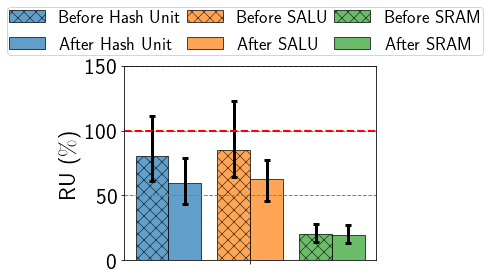

<Figure size 432x288 with 0 Axes>

In [17]:
import numpy as np

def get_reduction_rate(baseline, opt):
    return (baseline - opt)/(baseline+0.000001) * 100

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.7
matplotlib.rcParams['hatch.color'] = "black"

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1
#     plt.rcParams['xtick.labelbottom'] = False


markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'
colors = ['C0', 'C0', 'C1', 'C1', 'C2', 'C2']
run_name = "gd_5_5"
key_list = sorted(data['workload_1']['gd_5_5'].keys())
# key_list = [10]
key_list = [12]
for key in key_list:
#     fig, ax = plt.subplots(figsize=(5, 3))
    xaxis_title = "Number of sketch instances = " + str(key)
    print(run_name)
    result = {}
    min_result = {}
    max_result = {}
    for resource in ["hashcall", "salu", "sram"]:
        result[resource] = {}
        result[resource]["before"] = []
        result[resource]["after"] = []

        min_result[resource] = {}
        min_result[resource]["before"] = []
        min_result[resource]["after"] = []

        max_result[resource] = {}
        max_result[resource]["before"] = []
        max_result[resource]["after"] = []
        
#     fig, ax = plt.subplots(figsize=(10, 5))
    fig, ax = plt.subplots(figsize=(6, 4))

#     workload_list = ["T1", "T2", "T3", "T4", "T5"]
#     workload_list = ["T1. Same\nSketch", "T2. Same\nFlowkey", "T3. Same\nFlowsize", "T4. Random"]
    # workload_list = ["T1 Same Sketch", "T2 Same Flowkey", "T3 Same Flowsize", "T4 Random"]
    workload_list = [""]
    # workload_list = ["T1 Same Flowkey", "T2 Same Sketch", "T3 Same Epoch", "T4 Random"]



#     xlabel = [0, 1, 2, 3, 4]
    xlabel = np.arange(1)
    
#     for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
    for workload in ["workload_2"]:
    # for workload in ["workload_2", "workload_1", "workload_4", "workload_5"]:
        df_list = data[workload][run_name][key]["df_list"]

        df_len = len(df_list)

        for before_after in ['before', 'after']:
            for resource in ["hashcall", "salu", "sram"]:
                data_list = []
                for i in range(0, df_len):
                    data_list.append(df_list[i].loc[resource, before_after])
                sorted_list = sorted(data_list)
                result[resource][before_after].append(sorted_list[int(df_len*0.5)])
                min_result[resource][before_after].append(sorted_list[int(df_len*0.5)] - sorted_list[int(df_len*0.1)])
                max_result[resource][before_after].append(sorted_list[int(df_len*0.9)] - sorted_list[int(df_len*0.5)])


    i = 0

    width = 0.12
    for individual_resource, offset in zip(["hashcall", "salu", "sram"], [-2.5, 0, 2.5]):
        if individual_resource == "hashcall":
            label = "Hash Unit"

        if individual_resource == "salu":
            label = "SALU"

        if individual_resource == "sram":
            label = "SRAM"
        print("before", result[individual_resource]["before"])
        ax.bar(xlabel+(offset-0.5)*width,
               result[individual_resource]["before"],
               width,
               label="Before " + label,
#                hatch='...',
               alpha=0.7,
               hatch='XX',
               color=colors[i],
               edgecolor='black',
               yerr=[min_result[individual_resource]["before"], max_result[individual_resource]["before"]],
               error_kw=dict(lw=3, capsize=3, capthick=3))

        print("after", result[individual_resource]["after"])
        ax.bar(xlabel+(offset+0.5)*width,
               result[individual_resource]["after"],
               width,
               label="After " + label,
#                hatch='+++',
               alpha=0.7,
#                hatch='XX',
               color=colors[i+1],
               edgecolor='black',
               yerr=[min_result[individual_resource]["after"], max_result[individual_resource]["after"]],
               error_kw=dict(lw=3, capsize=3, capthick=3))
        i += 2

    ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
    # fig.canvas.draw()
    # ax.set_title(individual_resource + ' Usage ($\\%$) before vs after', fontsize=30)
    ax.set_xticks(np.arange(len(workload_list)))
    ax.set_xticklabels(workload_list, fontsize=18)
#     ax.set_xlabel(xaxis_title, fontsize=20)
    ax.set_yticks(np.arange(0, 450, step=50))
    ax.tick_params(axis='y', labelsize=23)
    ax.set_ylabel('RU ($\\%$)', fontsize=23)
    ax.set_ylim([0, 150])
    ax.legend(loc="lower left", bbox_to_anchor= (-0.5, 1.01), ncol=3, fontsize=18, columnspacing=0.3, borderpad=0.1)
    ax.axhline(y=100, color='red', linestyle="--", linewidth=2)
    # ax.legend(ncol=2, frameon=True, loc='best', borderaxespad=0.1,
    # handlelength=0.6, handletextpad=0.2, columnspacing=0.3, fontsize=20,
    # framealpha=0.5)
    ax.minorticks_off()
    plt.grid(color='gray', linestyle='--', linewidth=1, axis='y')
    plt.tight_layout()
    # latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
    latex_path = "."
    full_path = os.path.join(latex_path, "resource_usage_ppt.pdf")
    plt.savefig(full_path, bbox_inches='tight', pad_inches=0.02)
    plt.show()
    plt.clf()
    

